# Tecnológico de Costa Rica

## Curso EL 4702

## Proyecto 1 - Estadística Descriptiva

## Medidas de tendencia y dispersión

A continuación se presentan las funciones desarrolladas para calcular las medidas de tendencia y dispersión, además de los resultados de aplicar dichas funciones a los datos de humedad RH_2.

**Extracción y ordenamiento de los datos con Quicksort**

In [9]:
import numpy as np

import matplotlib.pyplot as plt

# Extraccion de datos del del archivo energydata_complete.csv

filename = 'energydata_complete.csv' # Nombre/ruta del archivo

# Esta funcion lee el archivo csv y guarda los datos en un array
# parametros: fname: nombre/ruta del archivo, delimiter: delimitador de las columnas, skip_header: ignora la primera linea, 
# dtype: especifica el tipo de datos (None para deteccion automatica), encoding: decodificacion (None para descartarla)
# usecols: selecciona las columnas a leer
datos = np.genfromtxt(filename, delimiter = ';', skip_header = 1, dtype = None, encoding = None, usecols = [0, 6])

# Se extraen los datos de humedad en un array aparte
humedad = np.array([elem[1] for elem in datos])

# Se ordenan los datos usando la funcion sort de numpy, utilizando el algoritmo quicksort
humedad.sort(kind = 'quicksort')

**Funciones de las medidas de tendencia**

In [10]:
# Funcion que calcula el promedio de un array
def promedio(lista):
    total = 0
    for n in range(len(lista)):
        total += lista[n]
    return total/(n + 1)

# Funcion que calcula la moda de un array
def moda(lista):
    # Se organiza el array en un diccionario y se cuenta el numero de repeticiones de cada valor
    valores = dict()
    for valor in lista:
        if valor in valores.keys():
            valores[valor] += 1
        else:
            valores[valor] = 1
    # Se buscan los valores maximos del diccionario, cuyas llaves seran la moda
    maximo = 1
    moda = []
    for key in valores:
        if valores[key] == maximo:
            moda.append([key, valores[key]])
        elif valores[key] > maximo:
            moda = [[key, valores[key]]]
            maximo = valores[key]
    return moda

# Funcion que calcula la mediana de un array
def mediana(lista):
    n = len(lista)
    if n % 2 == 0: 
        return (lista[int(n / 2) - 1] + lista[int((n / 2))]) / 2 # n par
    return lista[int((n + 1) / 2) - 1] # n impar

# Funcion que calcula los cuartiles de un array
def cuartiles(lista):
    n = len(lista)
    if n % 4 == 0:
        return [lista[int(n / 4) - 1], mediana(lista), lista[int(n * 3 / 4) - 1]] # n divisible por 4
    return [lista[int(n / 4)], mediana(lista), lista[int(n * 3 / 4)]] # n no divisible por 4

**Funciones de las medidas de dispersión**

In [11]:
# Funcion que calcula la varianza de un array
def varianza(lista):
    prom = promedio(lista)
    varianza = 0
    for n in range(len(lista)):
        varianza += (lista[n] - prom) ** 2
    return varianza / n

# Funcion que calcula la desviasion estandar de un array
def desviacion_estandar(lista):
    return varianza(lista) ** (1/2)

# Funcion que calcula el coeficiente de variacion un array
def coeficiente_de_variacion(lista):
    return desviacion_estandar(lista) * 100 / promedio(lista)

# Funcion que calcula el rango muestral de un array
def rango_muestral(lista):
    return max(lista) - min(lista)

# Funcion que calcula el rango intercuartil de un array
def RIC(lista):
    cuart = cuartiles(lista)
    return cuart[2] - cuart[0]

**Resultados**

In [12]:
_promedio = promedio(humedad)
_moda = moda(humedad)
_mediana = mediana(humedad)
_cuartiles = cuartiles(humedad)
_varianza = varianza(humedad)
_desviacion_estandar = desviacion_estandar(humedad)
_coeficiente_de_variacion = coeficiente_de_variacion(humedad)
_rango_muestral = rango_muestral(humedad)
_RIC = RIC(humedad)

print("Promedio: ", _promedio)
print("Moda, # de repeticiones: ", _moda)
print("Mediana: ", _mediana)
print("Cuartiles [Q1, Q2, Q3]: ", _cuartiles)

print("Varianza: ", _varianza)
print("Desviacion estandar: ", _desviacion_estandar)
print("Coeficiente de variacion: ", _coeficiente_de_variacion)
print("Rango muestral: ", _rango_muestral)
print("Rango intercuartilico: ", _RIC)

Promedio:  40.42042041370657
Moda, # de repeticiones:  [[40.0, 135]]
Mediana:  40.5
Cuartiles [Q1, Q2, Q3]:  [37.9, 40.5, 43.26]
Varianza:  16.56337411440203
Desviacion estandar:  4.069812540449748
Coeficiente de variacion:  10.068704132205596
Rango muestral:  35.563333333333404
Rango intercuartilico:  5.359999999999999


## Presentación de los datos

A continuación se presentan los datos mediante gráfico lineal, diagrama de cajas e histograma.

**Diagrama de cajas**

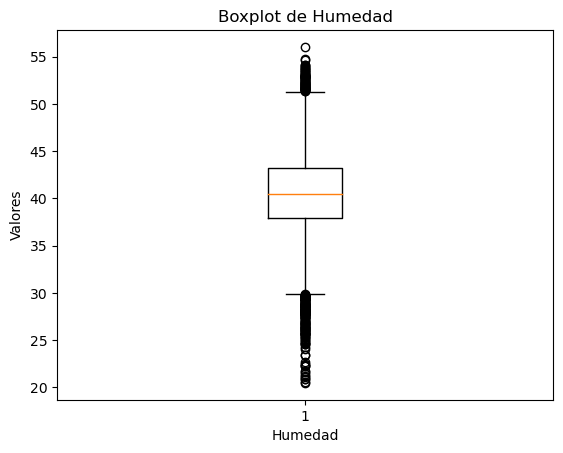

In [13]:
# Generar el boxplot
fig, ax = plt.subplots()
ax.boxplot(humedad)

# Configurar las etiquetas de los ejes y el título del boxplot
ax.set_xlabel('Humedad')
ax.set_ylabel('Valores')
ax.set_title('Boxplot de Humedad')

# Mostrar el boxplot
plt.show()

**Histograma**

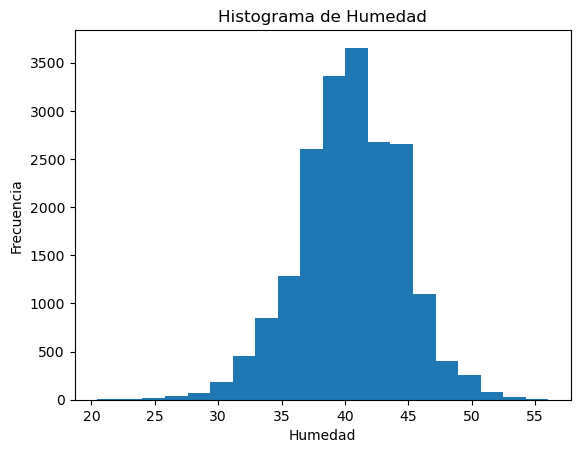

In [14]:
# Crear un histograma de los datos de humedad
plt.hist(humedad, bins=20)

# Configurar las etiquetas de los ejes y el título del histograma
plt.xlabel('Humedad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Humedad')

# Mostrar el histograma
plt.show()